# NANDISH M 
## B.TECH IT

## Loan Prediction Machine Learning Project

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

# Read Datasets

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape,test.shape

((614, 13), (367, 12))

In [4]:
train.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Removing  Outliers

<AxesSubplot:>

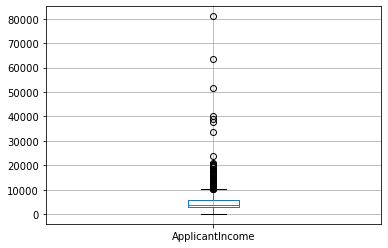

In [9]:
train.boxplot(column=['ApplicantIncome'])

<AxesSubplot:>

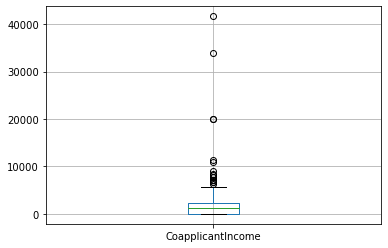

In [10]:
train.boxplot(column=['CoapplicantIncome'])

<AxesSubplot:>

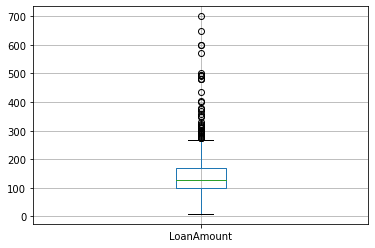

In [11]:
train.boxplot(column=['LoanAmount'])

In [6]:
Q1 = train['ApplicantIncome'].quantile(0.25)
Q3 = train['ApplicantIncome'].quantile(0.75)

IQR = Q3 - Q1

train = train[~((train['ApplicantIncome'] < (Q1 - 3 * IQR)) | (train['ApplicantIncome'] > (Q3 + 3 * IQR)))]
Q1 = train['CoapplicantIncome'].quantile(0.25)
Q3 = train['CoapplicantIncome'].quantile(0.75)

IQR = Q3 - Q1

train = train[~((train['CoapplicantIncome'] < (Q1 - 3 * IQR)) | (train['CoapplicantIncome'] > (Q3 + 3 * IQR)))]
Q1 = train['LoanAmount'].quantile(0.25)
Q3 = train['LoanAmount'].quantile(0.75)

IQR = Q3 - Q1

train = train[~((train['LoanAmount'] < (Q1 - 3 * IQR)) | (train['LoanAmount'] > (Q3 + 3 * IQR)))]

In [7]:
train.isna().sum()

Loan_ID               0
Gender               10
Married               3
Dependents           15
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       47
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

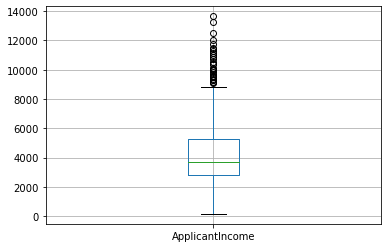

In [8]:
train.boxplot(column=['ApplicantIncome'])

In [9]:
from sklearn.utils import resample
train['Loan_Status'].value_counts()

Y    394
N    177
Name: Loan_Status, dtype: int64

In [10]:
# Separate majority and minority classes
train_majority = train[train.Loan_Status==1]
train_minority = train[train.Loan_Status==0]
 
# Upsample minority class
# train_minority_upsampled = resample(train_minority, 
#                                  replace=True,     # sample with replacement
# #                                  n_samples=22,    # to match majority class
#                                  random_state=123) # reproducible results
 
# # Combine majority class with upsampled minority class
# train = pd.concat([train_majority, train_minority_upsampled])

In [11]:
train.shape,test.shape

((571, 13), (367, 12))

In [12]:
total_df = pd.concat([train, test], sort=False)

In [13]:
total_df['Gender'].fillna(total_df['Gender'].mode()[0], inplace = True)
total_df['Married'].fillna(total_df['Married'].mode()[0], inplace = True)
total_df['Dependents'].fillna(total_df['Dependents'].mode()[0], inplace = True)
total_df['Self_Employed'].fillna(total_df['Self_Employed'].mode()[0], inplace = True)
total_df['LoanAmount'].fillna(total_df['LoanAmount'].mean(), inplace = True)
total_df['Loan_Amount_Term'].fillna(total_df['Loan_Amount_Term'].mode()[0], inplace = True)
total_df['Credit_History'].fillna(total_df['Credit_History'].mode()[0], inplace = True)

In [14]:
total_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,938.000000,938.000000,938.000000,938.000000,938.000000
mean,4503.833689,1483.623582,134.155702,342.533049,0.848614
std,3531.840491,1939.348434,56.316076,64.809099,0.358616
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2833.000000,0.000000,100.000000,360.000000,1.000000
50%,3728.000000,1197.000000,126.000000,360.000000,1.000000
75%,5176.750000,2359.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [15]:
total_df.drop('Loan_Amount_Term', axis = 1, inplace = True)

In [16]:
total_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,134.155702,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,1.0,Urban,Y


In [17]:
total_df.nunique()

Loan_ID              938
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      713
CoapplicantIncome    425
LoanAmount           212
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [18]:
total_df.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

In [19]:
X = total_df.drop('Loan_Status', axis = 1)
X = X.drop('Loan_ID', axis = 1)
Y = total_df['Loan_Status']

In [20]:
Y.value_counts()

Y    394
N    177
Name: Loan_Status, dtype: int64

In [21]:
X.shape, Y.shape

((938, 10), (938,))

In [22]:
X_cat = X.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], axis = 1)
X_num = X[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]

In [23]:
X_num

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,134.155702
1,4583,1508.0,128.000000
2,3000,0.0,66.000000
3,2583,2358.0,120.000000
4,6000,0.0,141.000000
...,...,...,...
362,4009,1777.0,113.000000
363,4158,709.0,115.000000
364,3250,1993.0,126.000000
365,5000,2393.0,158.000000


In [24]:
X_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,134.155702
1,4583,1508.0,128.000000
2,3000,0.0,66.000000
3,2583,2358.0,120.000000
4,6000,0.0,141.000000


<AxesSubplot:>

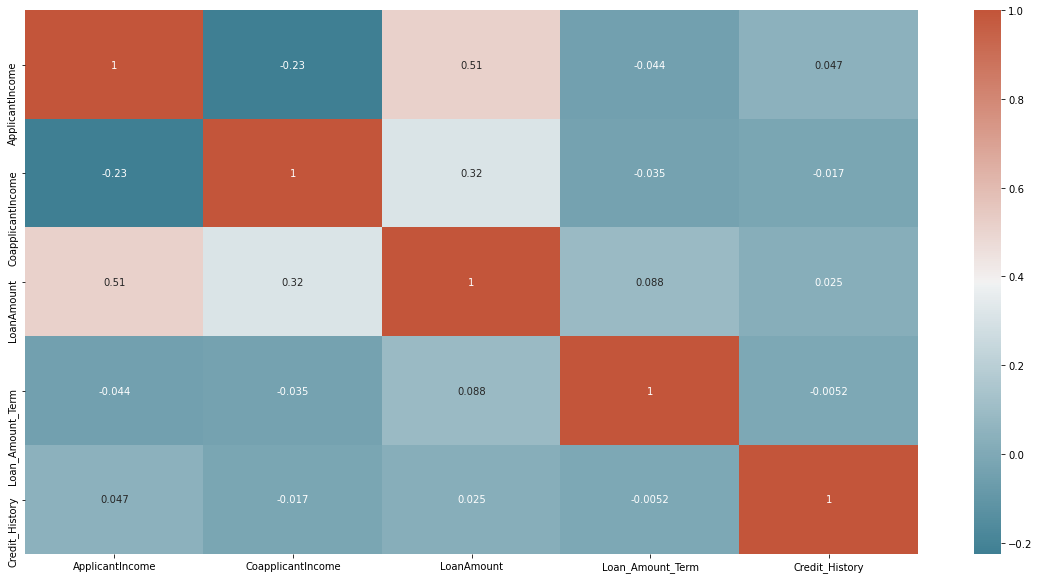

In [25]:
plt.figure(figsize=(20,10))
corr = train.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [26]:
X_one_hot = pd.get_dummies(X_cat, columns = X_cat.columns)
X_cat.shape, X_one_hot.shape, X_num.shape

((938, 7), (938, 17), (938, 3))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

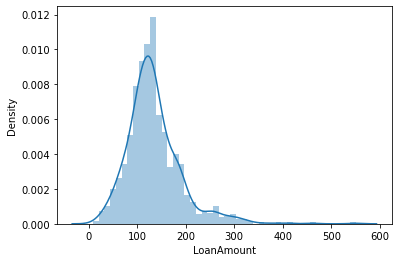

In [27]:
sns.distplot(X_num['LoanAmount'])

In [28]:
X_num.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,938.000000,938.000000,938.000000
mean,4503.833689,1483.623582,134.155702
std,3531.840491,1939.348434,56.316076
min,0.000000,0.000000,9.000000
25%,2833.000000,0.000000,100.000000
50%,3728.000000,1197.000000,126.000000
75%,5176.750000,2359.500000,158.000000
max,72529.000000,24000.000000,550.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

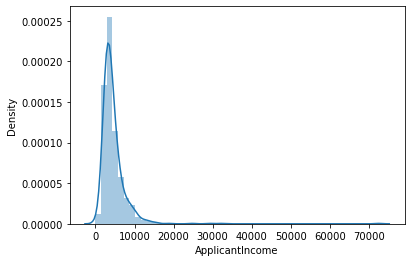

In [29]:
sns.distplot(X_num['ApplicantIncome'])

In [30]:
X_num['LoanAmount']

0      134.155702
1      128.000000
2       66.000000
3      120.000000
4      141.000000
          ...    
362    113.000000
363    115.000000
364    126.000000
365    158.000000
366     98.000000
Name: LoanAmount, Length: 938, dtype: float64

In [31]:
X_num = X_num[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].applymap(lambda x: np.log(x+1))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

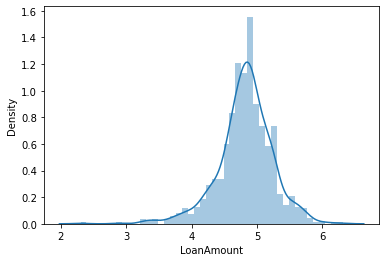

In [32]:
sns.distplot(X_num['LoanAmount'])

In [33]:
X_num.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
dtype: int64

In [34]:
X_num.shape, Y.shape

((938, 3), (938,))

In [35]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,134.155702,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.000000,1.0,Urban


In [36]:
X_num.reset_index(inplace = True, drop = True)
X_one_hot.reset_index(inplace = True, drop = True)

In [37]:
X = pd.concat([X_one_hot, X_num], axis = 1)
X.shape

(938, 20)

In [71]:
X_train = X[:614]
X_test = X[614:]

Y_train = Y[:614]
print("divedie")

divedie


In [72]:
Y_train=Y_train.astype(str)

# Creating Models

In [73]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats, model):
    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=repeats, random_state=1)
    # create model
    clf = model
    # evaluate model
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return np.mean(scores)

In [74]:
def cv_loop(X, Y, model):

  mean_acc = []
  seed = 42

  for i in range(10):

      X_train, X_cv, y_train, y_cv = train_test_split(X, Y, test_size = .20, random_state = i*seed)

      # train model and make predictions
      model.fit(X_train, y_train) 
      preds = model.predict(X_cv)

      # compute acc metric for this CV fold
      mean_acc.append(accuracy_score(y_cv, preds))
      
  return np.mean(mean_acc)

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [76]:
def model_testing(X, Y):
    print("Logistic Regression:")
    for c in [0.01, 0.1, 1, 10, 100]:
        acc = evaluate_model(X.values, Y.values, 3, LogisticRegression(C = c))
        print(f"For C: {c}, ACC: {acc}")

    print("KNN:")
    for n in [3, 5, 9, 15, 25, 35, 45]:
        acc = evaluate_model(X.values, Y.values, 3, KNeighborsClassifier(n_neighbors = n))
        print(f"For N: {n}, ACC: {acc}")

    print("SVC:")
    for c in [0.01, 0.1, 1, 10, 100]:
        acc = evaluate_model(X.values, Y.values, 3, SVC(C = c, random_state=42))
        print(f"For C: {c}, ACC: {acc}")
    
    print("Decision Trees:")
    for d in [1, 3, 5, 9, 15, None]:
        acc = evaluate_model(X.values, Y.values, 3, DecisionTreeClassifier(max_depth = d, random_state=42))
        print(f"For Max_Depth: {d}, ACC: {acc}")
    
    print("Naive Bayes:")
    acc = evaluate_model(X.values, Y.values, 3, GaussianNB())
    print(f"ACC: {acc}")

    print("Random Forest:")
    for n in [5, 10, 25, 50, 100, 200, 500, 1000]:
        acc = evaluate_model(X.values, Y.values, 3, RandomForestClassifier(n_estimators = n, random_state=42))
        print(f"For n_estimators: {n}, ACC: {acc}")

    print("XGBoost:")
    for l in [0.001, 0.01, 0.1, 0.5, 1]:
        acc = evaluate_model(X.values, Y.values, 3, XGBClassifier(learning_rate = l))
        print(f"For learning_rate: {l}, ACC: {acc}")

In [77]:
model_testing(X_train, Y_train)

Logistic Regression:
For C: 0.01, ACC: 0.7095295215247235
For C: 0.1, ACC: 0.7573192945044205
For C: 1, ACC: 0.7567728464169888
For C: 10, ACC: 0.7540628193167179
For C: 100, ACC: 0.7535208138966636
KNN:
For N: 3, ACC: 0.6628726287262872
For N: 5, ACC: 0.6856368563685636
For N: 9, ACC: 0.7008618774712339
For N: 15, ACC: 0.7035719045715046
For N: 25, ACC: 0.6970500688613444
For N: 35, ACC: 0.6698787151805944
For N: 45, ACC: 0.6611755297880848
SVC:
For C: 0.01, ACC: 0.6416544493313786
For C: 0.1, ACC: 0.6416544493313786
For C: 1, ACC: 0.7573192945044205
For C: 10, ACC: 0.7573192945044205
For C: 100, ACC: 0.7551512728242036
Decision Trees:
For Max_Depth: 1, ACC: 0.7573192945044205
For Max_Depth: 3, ACC: 0.7426584921586922
For Max_Depth: 5, ACC: 0.7290905859878272
For Max_Depth: 9, ACC: 0.6639566395663956
For Max_Depth: 15, ACC: 0.6308498822693146
For Max_Depth: None, ACC: 0.6227020302989916
Naive Bayes:
ACC: 0.718294904260518
Random Forest:
For n_estimators: 5, ACC: 0.6900128837353948
For

In [78]:
from sklearn.model_selection import train_test_split
X_train1, X_validation1, Y_train1, Y_validation1 = train_test_split(X_train, Y_train, train_size=0.7, random_state=1234)

In [79]:
model = XGBClassifier(learning_rate = 0.1)

model.fit(X_train1, Y_train1)
preds = model.predict(X_validation1)

accuracy_score(preds, Y_validation1)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:31:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.745945945945946

In [80]:
test.shape, X_test.shape

((367, 12), (324, 20))

In [84]:
test=test.head(324)

In [85]:
preds = model.predict(X_test)

In [89]:
df = pd.DataFrame(test['Loan_ID'], columns = ['Loan_ID']) 
df['Loan_Status']=preds

In [90]:
df.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


# Reading data to csv file

In [91]:
df['Loan_Status'][df['Loan_Status']==1] = 'Y'
df['Loan_Status'][df['Loan_Status']==0] = 'N'

In [93]:
 df.to_csv('Submission28_xgb_simple_0.01.csv', index = False)

# XGBOOST HYPER_TUNNING

In [ ]:
from sklearn.model_selection import GridSearchCV

#XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.001, 0.01, 0.1, 0.5],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['binary:logistic']
    }

    xgb_model = XGBClassifier()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                
                           cv = 5,
                           n_jobs = -1,
                           verbose = 2)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_, gsearch.best_score_

In [ ]:
hyperParameterTuning(X_train1,Y_train1)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


In [1]:
model = XGBClassifier(colsample_bytree= 0.5,
  learning_rate= 0.001,
  max_depth= 5,
  min_child_weight= 1,
  n_estimators= 500,
  objective= 'binary:logistic',
  subsample= 0.7)

model.fit(X_train1, Y_train1)
preds = model.predict(X_validation1)

accuracy_score(preds, Y_validation1)

NameError: name 'XGBClassifier' is not defined